# Skills challenge \#4
Below are a series of questions. Use the loaded data to answer the questions. You will almost certainly need to import more packages (`pandas`, `numpy`, etc.) to complete these. You are welcome to use any source except for your classmates. So Google away!

You will be graded on both the **correctness** and **cleanliness** of your work. So don't submit poorly written code or your grade will reflect that. Use Markdown describing what you have done. If you get stuck, move on to another part. Most questions don't rely on the answer to earlier questions.

### Imports

In [116]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### Data loading

In [83]:
df = pd.read_csv('../../data/hotel_bookings.csv')

In [88]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data description

This data is a collection of hotel bookings The columns we are interested in are:
- **is_canceled** - Value indicating if the booking was canceled (1) or not (0)
- **lead_time** - How many days before the stay the booking was created (i.e. how early they booked their stay)
- **arrival_date_year** - Year of arrival date
- **arrival_date_month** - Month of arrival date
- **arrival_date_week_number** Week number of year for arrival date
- **arrival_date_day_of_month** - Day of arrival date
- **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults** - Number of adults
- **children** - Number of children
- **babies** - Number of babies
- **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

## Tasks

### Data cleaning
**DC1:** Drop all columns except those listed above. Save this back as the variable `df`.

In [89]:
df = df[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 
         'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']]

**DC2:** For each column, print how many `None` or `NaN` values are in the column, along with what percentage of the rows are missing. Round the percentage to two decimal places. Your output should look like:

```
col1_name: 20 (0.05%) missing values 
col2_name: 150 (1.56%) missing values 
```

In [90]:
for c in df.columns:
    num_missing = df[c].isna().sum()
    print(f'{c}: {num_missing} ({num_missing / df.shape[0]:.2f}%) missing values')

is_canceled: 0 (0.00%) missing values
lead_time: 0 (0.00%) missing values
arrival_date_year: 0 (0.00%) missing values
arrival_date_month: 0 (0.00%) missing values
arrival_date_week_number: 0 (0.00%) missing values
arrival_date_day_of_month: 0 (0.00%) missing values
stays_in_weekend_nights: 0 (0.00%) missing values
stays_in_week_nights: 0 (0.00%) missing values
adults: 0 (0.00%) missing values
children: 4 (0.00%) missing values
babies: 0 (0.00%) missing values
is_repeated_guest: 0 (0.00%) missing values
previous_cancellations: 0 (0.00%) missing values
previous_bookings_not_canceled: 0 (0.00%) missing values


**DC3:** Drop all rows with any missing values.

In [91]:
df = df.dropna(how='any')

**DC4:** Make a new column `guests` which is the total number of people staying, so `adults + children + babies`.

In [92]:
df['guests'] = df['adults'] + df['children'] + df['babies']

**DC5:** Make a new column `arival_date_month_number` which is the month but as a number. So January=1, February=2, etc.

In [93]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
             'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month_number'] = df['arrival_date_month'].map(month_dict)

**DC6:** Make a new column `arrival_date` which is a Python date showing their arrival date. 

In [94]:
# Pandas to_datetime() function can do this directly, but it requires that the columns are named 'year', 'month' and 'day'. So rather
# than renaming the columns in our DataFrame, we'll just create a new DataFrame with only those columns and rename them there.
date_df = df[['arrival_date_year', 'arrival_date_month_number', 'arrival_date_day_of_month']]
date_df.columns = ['year', 'month', 'day']

df['arrival_date'] = pd.to_datetime(date_df)

### Data exporation


**DE1:** Compute the percentage of repeat guests (`is_repeated_guest==True`) that have cancelled (`is_canceled==1`) and have not cancelled (`is_canceled==0`). Do it again for non-repeat guests. Summarize what you see in a Markdown cell.

In [59]:
# Repeat guests
repeat_guest_df = df[df['is_repeated_guest'] == True]
repeat_guest_df.groupby('is_canceled')['arrival_date_year'].count() / repeat_guest_df.shape[0]

is_canceled
0    0.855118
1    0.144882
Name: arrival_date_year, dtype: float64

In [60]:
# New guests
new_guest_df = df[df['is_repeated_guest'] == False]
new_guest_df.groupby('is_canceled')['arrival_date_year'].count() / new_guest_df.shape[0]

is_canceled
0    0.622171
1    0.377829
Name: arrival_date_year, dtype: float64

We see that repeat guests cancel only about 14.5% of the time, while new guests cancel about 37.8% of the time.

**DE2:** Do families with children (so `children > 0` or `babies > 0`) tend to stay more on weekday nights or weekend nights? Also, divide the number of weekday nights by five to see the average number of nights per weekday. Divide the weekend nights by 2 to see the average number of stays per weekend night. Which is greater?

In [61]:
children_df = df[(df['children'] > 0) | (df['babies'] > 0)]
print(f"Weekday total: {children_df['stays_in_week_nights'].sum()}")
print(f"Weekend total: {children_df['stays_in_weekend_nights'].sum()}")

Weekday total: 26400
Weekend total: 10324


In [62]:
print(f"Weekday per day: {children_df['stays_in_week_nights'].sum() / 5}")
print(f"Weekend per day: {children_df['stays_in_weekend_nights'].sum() / 2}")

Weekday per day: 5280.0
Weekend per day: 5162.0


So either way, there are more stays during the week. However, once you look at the stays per-day, it is much closer between the two.

### Linear regression

**LR1:** Create a linear regression model to predict the lead time, based on the week of the year (`arrival_date_week_number`) and the number of guests. Use 70% of the data as the training set, and train your model only on this training set. Print out the coefficients and y-intercept of the regression line.

In [106]:
train_df, test_df = train_test_split(df, test_size=0.3)

X_train = train_df[['arrival_date_week_number', 'guests']]
y_train = train_df['lead_time']

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients: [ 0.98618076 10.12149732]
Intercept: 57.21449937424346


**LR2:** Make a scatterplot comparing the actual and predicted lead times from your regression model. Use your test set to do this, not your training set. Also, show the $R^2$ value. Finally, label the x and y axes and give your graph a title.

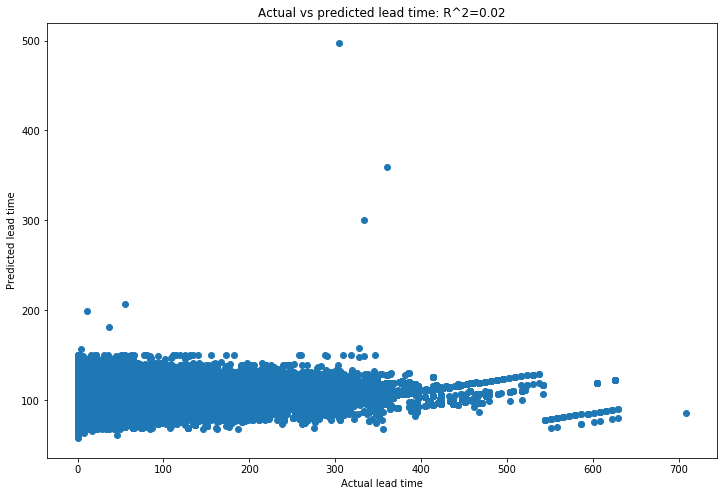

In [107]:
X_test = test_df[['arrival_date_week_number', 'guests']]
y_test = test_df['lead_time']

y_pred = lr.predict(X_test)

fig = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.title(f'Actual vs predicted lead time: R^2={lr.score(X_test, y_test):.2f}')
plt.xlabel('Actual lead time')
plt.ylabel('Predicted lead time');

**LR3:** Investigate the data and explain why this does such a terrible job of predicting the lead time. What features of the data make this happen?

Linear regression should be used with continuous data. However, `guests` is not very continuous. We can see that there are only a few possible values:

In [79]:
df['guests'].value_counts()

2.0     82048
1.0     22581
3.0     10494
4.0      3929
0.0       180
5.0       137
26.0        5
27.0        2
12.0        2
10.0        2
20.0        2
55.0        1
6.0         1
50.0        1
40.0        1
Name: guests, dtype: int64

With the exception of a few large parties, almost all bookings involve 0, 1, 2, 3, or 4 guests. In addition, `arrival_week_number` only takes values between 1 and 52, which again is not especially continuous.

**LR4:** Create a new column `previous_bookings` which is `previous_bookings_not_canceled` + `previous_cancellations`. Use this new column to predict the `lead_time`. Again, use 30% of the data as the test set, and make a scatterplot showing your results. Write up a paragraph or so describing what you see.

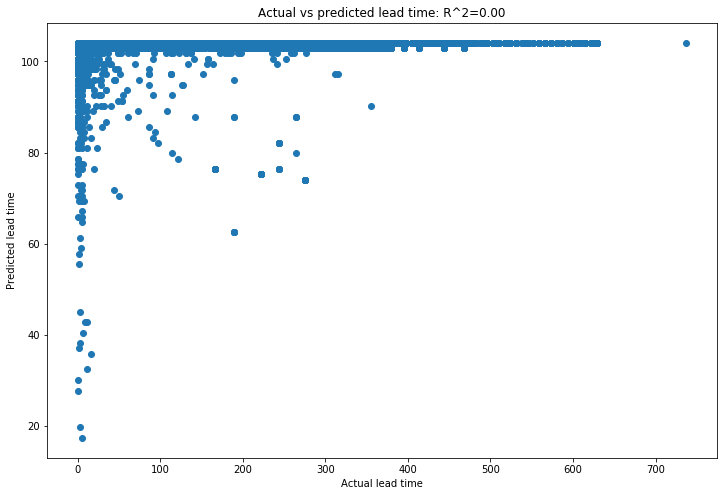

In [104]:
df['previous_bookings'] = df['previous_bookings_not_canceled'] + df['previous_cancellations']

train_df, test_df = train_test_split(df[['previous_bookings', 'lead_time']], test_size=0.3)

X_train = train_df[['previous_bookings']]
y_train = train_df['lead_time']

X_test = test_df[['previous_bookings']]
y_test = test_df['lead_time']

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

fig = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.title(f'Actual vs predicted lead time: R^2={lr.score(X_test, y_test):.2f}')
plt.xlabel('Actual lead time')
plt.ylabel('Predicted lead time');

We see that lead time is not easily predicted, as almost all predictions involve very high lead times. We can look at the original data to see why:

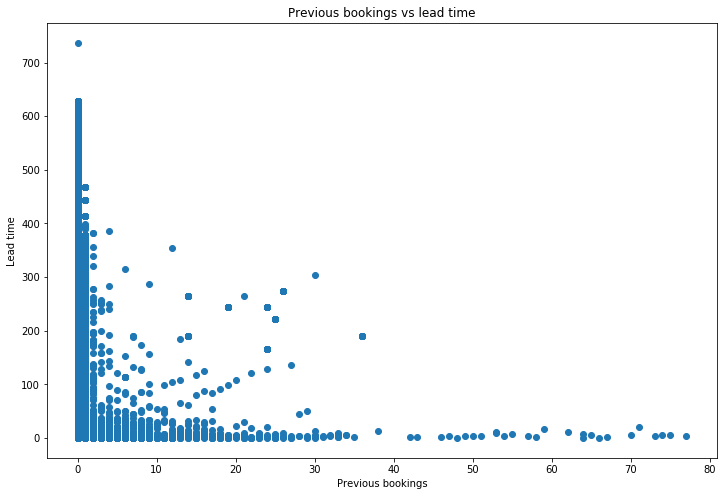

In [111]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(train_df['previous_bookings'], train_df['lead_time'])
plt.title('Previous bookings vs lead time')
plt.xlabel('Previous bookings')
plt.ylabel('Lead time');

We see that there are two distinct cases. One is people who are new or nearly new (very low previous bookings), and their lead time is all over the place. The other is people with many previous bookings, all of whom seem to book at the last minute (very low lead time). When these two things are put together, the result is not at all linear. Perhaps linear regression *could* be used to model lead time for people with many previous bookings, as their pattern does seem more linear. Here is a quick analysis:

R^2 = 0.19


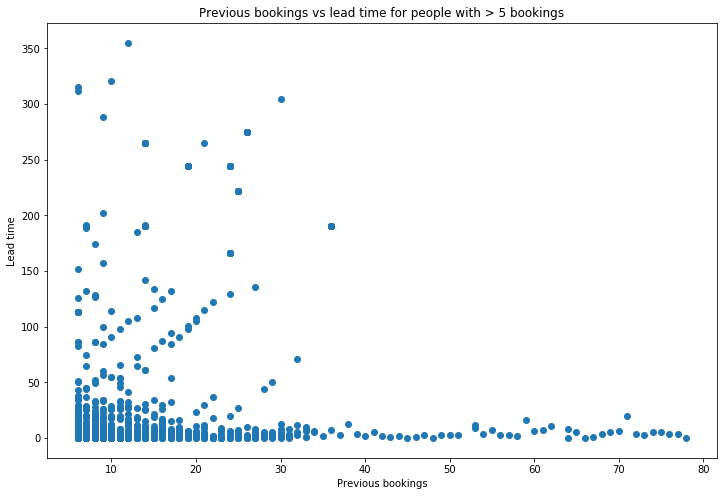

In [121]:
regular_customers_df = df[df['previous_bookings'] > 5]

fig = plt.figure(figsize=(12, 8))
plt.scatter(regular_customers_df['previous_bookings'], regular_customers_df['lead_time'])
plt.title('Previous bookings vs lead time for people with > 5 bookings')
plt.xlabel('Previous bookings')
plt.ylabel('Lead time')

print(f"R^2 = {np.corrcoef(regular_customers_df['previous_bookings'], regular_customers_df['lead_time'])[0, 1]:.2f}");